In [ ]:
using GynC
using Plots

In [2]:
rho_std = 5
xs, ys, datas, zs = GynC.Federn.federexperiment(nx=300, zmult=1, ndata=200, rho_std=rho_std, xmin=1, xmax=110);

zsdict = Dict()
for mult = [1,10,20,50,100,200,300]
   zsdict[mult] = GynC.Federn.perturb.(repmat(ys,mult), 5)
end

In [3]:
# add 0.1 to circumvent 0 weight
w0 = GynC.Federn.wbeta(xs, 110+0.1);

In [4]:
ws = Dict()
niter = 50
h = 0.02

hz(w, mult) = GynC.Hz(w, ys, zsdict[mult], 5)

for (mult, zs) in zsdict
    ws[mult] = GynC.gradientascent(w->hz(w, mult), w0, niter, h)
end

INFO: computing likelihood matrix
INFO: computing likelihood matrix
INFO: computing likelihood matrix
INFO: computing likelihood matrix
INFO: computing likelihood matrix
INFO: computing likelihood matrix
INFO: computing likelihood matrix


In [5]:
zsuni = let n=256, size=20
    reshape([[x,y] for x in linspace(-size, size, n), y in linspace(-size, size, n)], n^2)
end

function hzuni(w)
    l = GynC.likelihoodmat(zsuni, ys, rho_std)
    rhoz = l*w
    rhoz = rhoz/sum(rhoz)
    h=0.
    for r in rhoz
        h-= r * log(r)
    end
    h
end

hzuni (generic function with 1 method)

In [6]:
using KernelDensity

function mykde(ys, w)
  a = map(x->x[1], ys)
  b = map(x->x[2], ys)

  k=kde((a,b), weights = w, bandwidth=(5.,5.))
  k.x, k.y, k.density
end

function hzkde(w)
    _,_,rhoz = mykde(ys, w)
    rhoz = rhoz / sum(rhoz)
    h=0.
    for d in rhoz
        h-= d * log(d)
    end
    h
end

hzkde (generic function with 1 method)

INFO: computing likelihood matrix



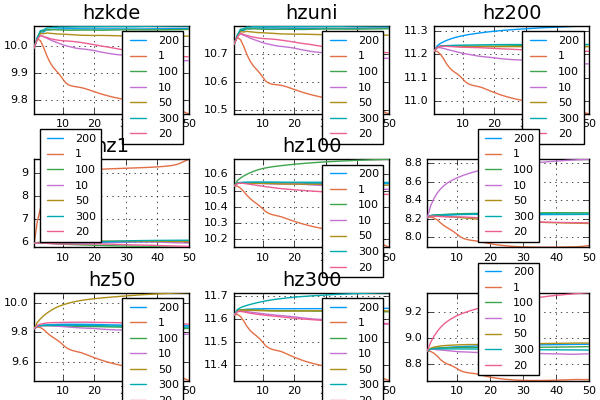

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
function objplot(obj; kwargs...)
    p = plot(size=(600,400))
    for (k,v) in ws
        plot!(p, map(obj,v), label=k; kwargs...)
    end
    p
end

plot(
objplot(hzkde, title="hzkde"),
objplot(hzuni, title="hzuni"),
[objplot(w->hz(w, mult), title="hz$mult") for (mult,w) in ws]...)